<h1 align="center"><b>Modelación Financiera I</b></h1>
<h1 align="center"><b> Módulo 6 </b></h1>
<h1 align="center"><b> Series de tiempo  </b></h1>

*** 

***Docente:*** Santiago Rúa Pérez, PhD.

***e-mail:*** srua@udemedellin.edu.co

***Herramienta:*** [Jupyter Notebook](http://jupyter.org/)

***Kernel:*** Python 3.7

***MEDELLÍN - COLOMBIA***

***2022***

***

<h1>Tabla de Contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item">
    <li><span><a href="#Trabajando-con-series-de-tiempo" data-toc-modified-id="Trabajando-con-series-de-tiempo-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Trabajando con series de tiempo</a></span></li>
    <li><span><a href="#Fechas-y-tiempos-nativos-de-Python" data-toc-modified-id="Fechas-y-tiempos-nativos-de-Python-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fechas y tiempos nativos de Python</a></span></li>
    <li><span><a href="#Estructura-de-series-de-tiempo-con-Pandas" data-toc-modified-id="Estructura-de-series-de-tiempo-con-Pandas-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Estructura de series de tiempo con Pandas</a></span></li>
    <li><span><a href="#Remuestreo,-desplazamiento-y-creaci%C3%B3n-de-ventanas" data-toc-modified-id="Remuestreo,-desplazamiento-y-creaci%C3%B3n-de-ventanas-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Remuestreo, desplazamiento y creación de ventanas</a></span></li>
    <li><span><a href="#Ventanas-m%C3%B3viles" data-toc-modified-id="Ventanas-m%C3%B3viles-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Ventanas móviles</a></span></li>
    <li><span><a href="#Descomponer-series-de-tiempo" data-toc-modified-id="Descomponer-series-de-tiempo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Descomponer series de tiempo</a></span></li>
    <li><span><a href="#Usar-y-remover-tendencias" data-toc-modified-id="Usar-y-remover-tendencias-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Usar y remover tendencias</a></span></li>
    <li><span><a href="#Usar-y-remover-estacionalidad" data-toc-modified-id="Usar-y-remover-estacionalidad-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Usar y remover estacionalidad</a></span></li>
    <li><span><a href="#Estacionaridad-en-series-de-tiempo" data-toc-modified-id="Estacionaridad-en-series-de-tiempo-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Estacionaridad en series de tiempo</a></span></li>
    <li><span><a href="#Laboratorio" data-toc-modified-id="Laboratorio-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Laboratorio</a></span></li>
    </ul></div>

In [ ]:
%matplotlib inline

## Trabajando con series de tiempo

Pandas fue desarrollado en el contexto de modelación financiera, por lo anterior tiene un conjunto extenso de herramientas para trabajar con fechas, tiempo, y datos indexados con tiempo. Fechas y datos de tiempo vienen con las siguientes características:

- Las etiquetas de tiempo referencia momentos particulares, ejemplo: July 4th, 2015 at 7:00am
- Periodos e intervalos de tiempo hacen referencia a longitudes que tienen inicio y final, por ejemplo: año 2015
- Deltas de tiempo hacen referencia a longitud exacta, ejemplo: 22.5 segundos. 

## Fechas y tiempos nativos de Python

El objeto o clase por defecto para trabajar con fechas en python es el modulo interno de `datetime`. 

In [ ]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [ ]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [ ]:
date.strftime('%A')

'Saturday'

En la última línea, se uso el formato estándar de salida para imprimir fechas, el cual puede leer más información en [strftime section](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

La potencia de estas librerias está en su fácil uso y flexibilidad en su sintaxis. Donde fallan es cuando se requiere trabajar con listado grande de fechas y tiempo

### Fechas y tiempo en Pandas

Pandas esta construido sobre estas herramientas y crea un objeto propio llamado `Timestamp`, el cual combina las librerias antes vistas con el manejo eficiente vectorizado. Pandas entonces es capaz de construir in indice tipo `DatetimeIndex` el cual puede ser usado tanto en series como en dataframe

In [ ]:
import pandas as pd
date = pd.to_datetime("25th of July, 2015")
date

Timestamp('2015-07-25 00:00:00')

In [ ]:
date.strftime('%A')

'Saturday'

In [ ]:
date + pd.to_timedelta(np.arange(12), 'D') 

DatetimeIndex(['2015-07-25', '2015-07-26', '2015-07-27', '2015-07-28',
               '2015-07-29', '2015-07-30', '2015-07-31', '2015-08-01',
               '2015-08-02', '2015-08-03', '2015-08-04', '2015-08-05'],
              dtype='datetime64[ns]', freq=None)

Entonces, como podemos realizar indexación de un objeto tipo serie o dataframe teniendo en cuenta el tiempo?

El primer paso es crear el objeto tipo `DatetimeIndex` y crear dicha serie o dataframe con el index

In [ ]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [ ]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [ ]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

## Estructura de series de tiempo con Pandas

A continuación se hablará de las estructuras de datos fundamentales de Pandas para trabajar con series de tiempo

- Para *time stamps*, Pandas introduce el tipo `Timestamp`. Es un remplazo de la libreria nativa de Python `datetime`, pero mas eficiente. La estructura para el indice está dada por `DatetimeIndex`
- Para *time Periods*, Pandas introduce el tipo `Period`. Este codifica un intervalo fijo y cuya estructura para el indice está dado por `PeriodIndex`.
- Para *time deltas* o *durations*, Pandas introduce el tipo `Timedelta`. Este es una forma más eficiente de la libreria nativa `datetime.timedelta` y su estructura de indice está dado por `TimedeltaIndex`


In [ ]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [ ]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

Para la creación de estas fechas, Pandas nos ofrece un conjunto de funciones los cuales pueden ser usados de la siguiente forma: `pd.date_range()` para timestamps, `pd.period_range()` para periodos, y `pd.timedelta_range()` para deltas

In [ ]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [ ]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [ ]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

Es importante entender la notación para los códigos de los calendarios

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``M``  | Month end           | ``BM`` | Business month end   |
| ``Q``  | Quarter end         | ``BQ`` | Business quarter end |
| ``A``  | Year end            | ``BA`` | Business year end    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |        |                      |
| ``S``  | Seconds             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |


| Code    | Description            || Code    | Description            |
|---------|------------------------||---------|------------------------|
| ``MS``  | Month start            ||``BMS``  | Business month start   |
| ``QS``  | Quarter start          ||``BQS``  | Business quarter start |
| ``AS``  | Year start             ||``BAS``  | Business year start    |

In [ ]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

## Remuestreo, desplazamiento y creación de ventanas

La capacidad de usar fechas y horas como índices para organizar y acceder de manera intuitiva a los datos es una pieza importante de las herramientas de series temporales de Pandas. Los beneficios de los datos indexados en general (alineación automática durante las operaciones, división y acceso intuitivo de datos, etc.) aún se aplican, y Pandas proporciona varias operaciones adicionales específicas de series temporales.

Para ver esto, se usará algunos datos de precios de acciones como ejemplo. Debido a que Pandas se desarrolló principalmente en un contexto financiero, incluye algunas herramientas muy específicas para datos financieros. Por ejemplo, el paquete `pandas-datareader` que lo acompaña (instalable a través de `conda install pandas-datareader`), sabe cómo importar datos financieros de varias fuentes disponibles, incluidas Yahoo Finance, Quandl, Tiingo y otras. Aquí cargaremos el historial de precios de cierre de Google:

In [ ]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [ ]:
goog = goog['Close']

In [ ]:
goog.size

2863

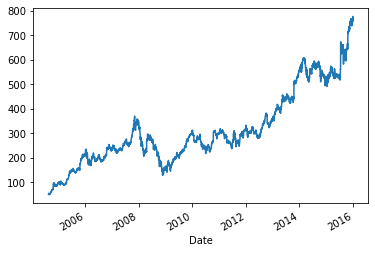

In [ ]:
import matplotlib.pyplot as plt
goog.plot();

Una necesidad común de datos de series temporales es volver a muestrear a una frecuencia más alta o más baja. Esto se puede hacer usando el método `resample()`, o el método mucho más simple `asfreq()`. La principal diferencia entre los dos es que `resample()` es fundamentalmente una agregación de datos, mientras que `asfreq()` es fundamentalmente una selección de datos.

Echando un vistazo al precio de cierre de Google:



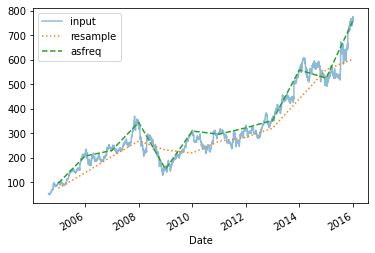

In [ ]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

In [ ]:
a = goog.resample('BA').mean()
print(a)
b = goog.asfreq('BA')
print(b)
print(goog.loc['2004-12-31'])

Date
2004-12-31     75.617206
2005-12-30    138.360933
2006-12-29    204.824916
2007-12-31    268.369305
2008-12-31    231.558071
2009-12-31    219.023214
2010-12-31    266.811472
2011-12-30    283.424738
2012-12-31    320.208021
2013-12-31    440.470378
2014-12-31    559.803290
2015-12-31    602.005681
2016-12-30           NaN
Freq: BA-DEC, Name: Close, dtype: float64
Date
2004-12-31     96.035034
2005-12-30    206.655411
2006-12-29    229.380234
2007-12-31    344.448914
2008-12-31    153.250580
2009-12-31    308.832428
2010-12-31    295.875977
2011-12-30    321.744019
2012-12-31    352.369232
2013-12-31    558.262512
2014-12-31    524.958740
2015-12-31    758.880005
Freq: BA-DEC, Name: Close, dtype: float64
96.0350341796875


Otra operación común específica de series de tiempo es el desplazamiento de datos en el tiempo. Pandas tiene dos métodos estrechamente relacionados para calcular esto: `shift()` y `tshift()`. En resumen, la diferencia entre ellos es que `shift()` cambia los datos, mientras que `tshift()` cambia el índice. En ambos casos, el cambio se especifica en múltiplos de la frecuencia.

Aquí haremos `shift()` y `tshift()` por 900 días

/home/sruap/anaconda3/envs/MLFinance/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  


Date
2004-08-19    49.982655
2004-08-20    53.952770
2004-08-21    53.952770
2004-08-22    53.952770
2004-08-23    54.495735
Freq: D, Name: Close, dtype: float64

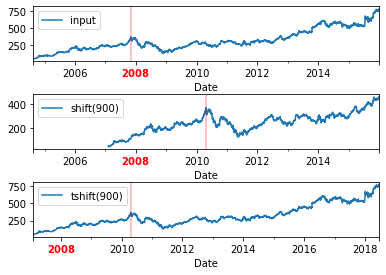

In [ ]:
fig, ax = plt.subplots(3)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.6)

goog.head()

Tipicamente este tipo de operaciones se utiliza para realizar diferencia o diferenciación en el tiempo. Por ejemplo, se puede usar los valores desplazados para calcular el retorno de la inversión de la acción de Google en un año.

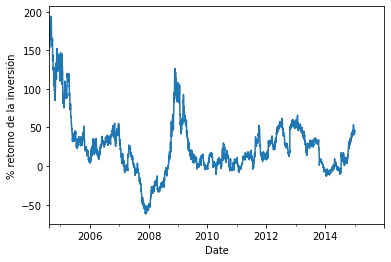

In [ ]:
ROI = 100 * (goog.shift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% retorno de la inversión');

## Ventanas móviles

Pandas posibilita realizar implementaciones de ventanas moviles a series temporales en sus datos. Esto se puede lograr a través del atributo `rolling()` de los objetos `Series` y `DataFrame`, que devuelve una vista similar a la que vimos con la operación groupby. Esta vista continua pone a disposición una serie de operaciones de agregación de forma predeterminada.

Por ejemplo, aquí está la media móvil centrada en un año y la desviación estándar de los precios de las acciones de Google:

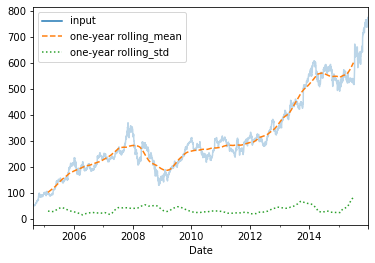

In [ ]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

Si desea conocer mas sobre este tema, consulte la página directa de Pandas ["Time Series/Date" section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html)

## Descomponer series de tiempo

## Usar y remover tendencias

## Usar y remover estacionalidad

## Estacionaridad en series de tiempo

## Laboratorio

- ***Ejercicio 1.*** Consiga una base de datos correspondiente a los temas que usted trabaja a diario. Con lo visto en clase realice visualizaciones de la misma y responda preguntas propias en donde implique realizar operaciones de agrupación, agregaciones, entre otras. 


- ***Ejercicio 2.*** Proceda a descargarse el conjunto de datos temporales sobre el uso o conteo de bicicletas en el [Puente Fremont] de Seattle (http://www.openstreetmap.org/#map=17/47.64813/-122.34965). Estos datos provienen de un contador de bicicletas automatizado, instalado a fines de 2012, que tiene sensores inductivos en las aceras este y oeste del puente.

    Los recuentos de bicicletas por hora se pueden descargar de [link](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k).
    
    Cargue el archivo a un dataframe y obtenga información util tal como: la distribución del tráfico de bicicletas en el día, o como se compara este con respecto a los fines de semana. 